## Next Word Prediction using ML

- Regular expression
-  Word tokenization
- Named Entity Recognition
- Stemming and lemmatization
- Word cloud
- Bag-of-words (BoW)
- Term Frequency — Inverse Document Frequency (TF-IDF)
- Sentiment analysis
- Text Regression (Automated Machine Learning and Deep Learning)
- Text Classification (Automated Deep Learning)

In [2]:
!ls

 archive.zip		      'Womens Clothing E-Commerce Reviews.csv'
'Next word Prediction.ipynb'


In [3]:
import pandas as pd 

df = pd.read_csv("./Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Dataset exploration

In [4]:
df.columns.to_list()

['Unnamed: 0',
 'Clothing ID',
 'Age',
 'Title',
 'Review Text',
 'Rating',
 'Recommended IND',
 'Positive Feedback Count',
 'Division Name',
 'Department Name',
 'Class Name']

In [5]:
df.shape

(23486, 11)

In [9]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [11]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [12]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [28]:
# df.columns.rename( inplace = True)
import re 
{k : re.sub(r'\s' , '_' , k) for k in df.columns}

{'Unnamed: 0': 'Unnamed:_0',
 'Clothing ID': 'Clothing_ID',
 'Age': 'Age',
 'Title': 'Title',
 'Review Text': 'Review_Text',
 'Rating': 'Rating',
 'Recommended IND': 'Recommended_IND',
 'Positive Feedback Count': 'Positive_Feedback_Count',
 'Division Name': 'Division_Name',
 'Department Name': 'Department_Name',
 'Class Name': 'Class_Name'}

In [29]:
import re 
df.rename( columns= {k : re.sub(r'\s' , '_' , k) for k in df.columns} , inplace=True)
df.head()

,Unnamed:_0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [32]:
df = df.dropna()
df.isna().sum()

Clothing_ID                0
Age                        0
Title                      0
Review_Text                0
Rating                     0
Recommended_IND            0
Positive_Feedback_Count    0
Division_Name              0
Department_Name            0
Class_Name                 0
dtype: int64

In [30]:
df = df.iloc[:,1:]
df.head(2)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [52]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/saugat/nltk_data...


True

In [53]:
import nltk

from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [54]:
time()
data = df['Review_Text']

class Lemmatizer:
    def __init__(self):
        self.lemm = WordNetLemmatizer()
        
    def __call__(self,df):
        return [self.lemm.lemmatize(word) for word in word_tokenize(df)]

vectorizer = CountVectorizer(
    max_features = 100 ,
    max_df = 0.95 ,
    min_df = 0.1 ,
    ngram_range = (1,2),
    tokenizer=Lemmatizer(),
    lowercase=True ,
    stop_words='english',
    token_pattern=r'\w+',
)
vectorizer.fit(df['Review_Text'])
count_vector = vectorizer.transform(df['Review_Text'])
count_vector

/home/saugat/Desktop/NLP/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


<19662x46 sparse matrix of type '<class 'numpy.int64'>'
	with 182772 stored elements in Compressed Sparse Row format>

In [56]:
bow = count_vector.toarray()
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
bow.head()

,!,','','m,'s,(,),",",. 'm,. 's,...,ordered,perfect,really,run,size,small,soft,wa,wear,work
0,1,0,0,0,0,2,2,4,0,0,...,1,0,1,0,1,3,0,3,0,1
1,2,0,0,0,1,0,0,5,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,1,0,1,1,1
4,0,0,0,0,0,3,4,6,0,0,...,0,0,1,0,1,0,0,1,0,0


In [63]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt 

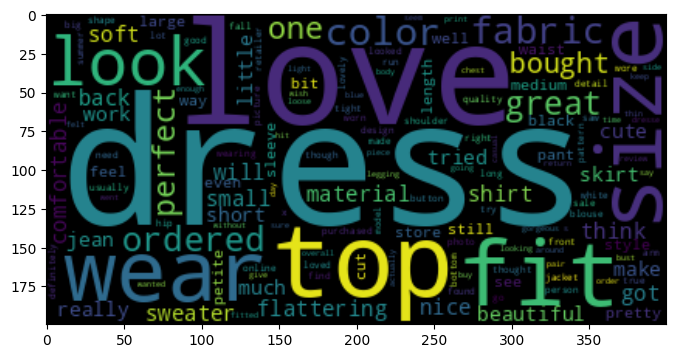

In [64]:
visual_rev = WordCloud().generate(' '.join(df['Review_Text']))
plt.figure(figsize=(8,8))
plt.imshow(visual_rev, interpolation='bilinear')
plt.show()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tfidf = TfidfVectorizer(max_features=100)
tfidf.fit(df['Review_Text'])
tfidf_data = tfidf.transform(df['Review_Text'])
tfidf_data

<19662x100 sparse matrix of type '<class 'numpy.float64'>'
	with 432541 stored elements in Compressed Sparse Row format>

In [68]:
tfidf_data = pd.DataFrame(tfidf_data.toarray(), columns=tfidf.get_feature_names_out())
tfidf_data.head()

,all,also,am,an,and,are,as,at,back,be,...,wear,well,when,which,will,with,work,would,xs,you
0,0.000000,0.0,0.000000,0.0,0.163203,0.0,0.000000,0.000000,0.0,0.111274,...,0.000000,0.00000,0.0,0.151504,0.0,0.000000,0.163274,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.141569,0.0,0.000000,0.000000,0.0,0.000000,...,0.298153,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.227341,0.0,0.000000,0.0,0.082728,0.0,0.000000,0.000000,0.0,0.000000,...,0.174229,0.21739,0.0,0.000000,0.0,0.271761,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.108151,0.0,0.194461,0.0,0.000000,0.000000,0.0,0.000000,...,0.102387,0.00000,0.0,0.000000,0.0,0.000000,0.145910,0.112295,0.000000,0.0
4,0.159590,0.0,0.129192,0.0,0.174221,0.0,0.128587,0.137178,0.0,0.000000,...,0.000000,0.00000,0.0,0.161733,0.0,0.190773,0.000000,0.134143,0.179258,0.0


In [69]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 KB 1.6 MB/s eta 0:00:00m eta 0:00:010:01:01


In [70]:
from textblob import TextBlob

In [71]:
TextBlob("hi i am Saugat. happy ! happy !! happy!!!").sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [73]:
# Applying text blob sentiment
def polarity(t):
    a = TextBlob(t).sentiment
    return a[0]

def subjectivity(t):
    a = TextBlob(t).sentiment
    return a[1]

df['polarity'] = df.apply(lambda t: polarity(t['Review_Text']), axis=1)
df['subjectivity'] = df.apply(lambda t: subjectivity(t['Review_Text']), axis=1)
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,polarity,subjectivity
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,0.533125
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.133750,0.607778


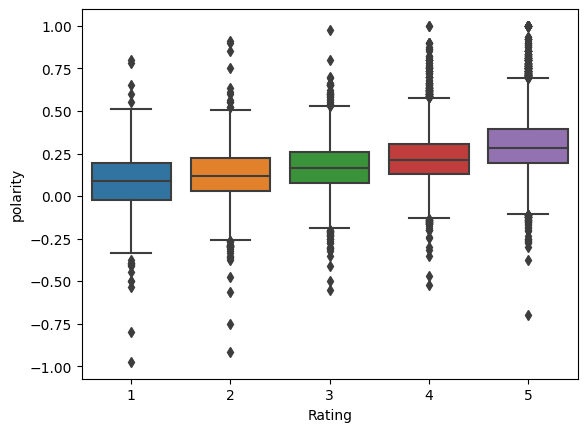

In [74]:
import seaborn as sns

# Polarity and Rating
sns.boxplot(data=df, x='Rating', y='polarity')
plt.show()

### Text Regression 

In [77]:
!pip install scipy
!apt install -y build-essential swig curl
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0xargs: warning: options --max-args and -L are mutually exclusive, ignoring previous --max-args value
100   259  100   259    0     0    257      0  0:00:01  0:00:01 --:--:--   257
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1003 lines of output]
      Par

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/160.1 KB 3.0 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 568.7 kB/s eta 0:00:0031m4.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.3/969.3 KB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 KB 442.3 kB/s eta 0:00:0031m17.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 KB 2.1 MB/s eta 0:00:006.6 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11730 sha256=b8ff67b8604cadfde1c1e8da2a63ceee8c12def7cd26227ad32e7e70d62bfebf
  Stored in directory: /home/saugat/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4

  Preparing metadata (setup.py) ... done
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7041 sha256=b4f6efb58ea4b3688fd9d96bedcdf31deb63f19380a533511ad7714200ee2e2a
  Stored in directory: /home/saugat/.cache/pip/wheels/90/7b/53/b21d6b41910f43c7f1557262e579598f83e75e44c659c1bcce
Successfully built pynisher
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 5.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 KB 1.1 MB/s eta 0:00:000:00:01m eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 770.5 kB/s eta 0:00:00 MB/s eta 0:00:01
  Created wheel for smac: filename=smac-1.2-py3-none-any.whl size=215931 sha256=5b4a8023ff20799bba0962fe80886b0cf6b912b84f56fe777daa6b8038df3966
  Stored in directory: /home/saugat/.cache/pip/wheels/66/2e/d9/2db14bdfcdc36bf12e202b44201df03f194367fcfd85ce2778
Successfully built smac
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641946 sha256=dd5b28187c1503081b1d32b7c145678d86ab19f9be8837c85c79118df23571ce
  Stored in directory: /home/saugat/.cache/pip/wheels/4d/0a/f9/8c1a06bcc36bc16b467b044b5bb03a90f92a5c5e6cd443414b
  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1003 lines of output]
      Partial import of sklearn during the build process.
      <string>:116: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools 

In [79]:
# from autosklearn.regression import AutoSklearnRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix